# Section 0
- Submission Date : 24/11/2024
- QPM 2024-2025: Assignment 4
- Members :  
CAO Yu  
ESCATO Ugo  
HERVE Gauthier  
KAEPPELIN Teodor  
MEDDEB Malek  


- Diversity:
1. Academic background : some did prepa, others went to univerisity,
2. Nationality : French, Chinese, Tunisian
3. Python : some very familiar with Python and machine learning, others not at all

# Section 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sklearn.preprocessing import StandardScaler

## Question 1 of Assignment 4

In [5]:
df = pd.read_excel('QPM-FactorsData-ForAssignment-04.xlsx')

In [6]:
df.head()

,Dates,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
0,196702,0.0078,0.0334,-0.0217,0.0194,-0.0094,0.0356,0.035317,-0.002064,0.0262
1,196703,0.0399,0.0163,0.0031,0.0090,-0.0151,0.0142,0.018876,-0.016933,0.0081
2,196704,0.0389,0.0062,-0.0264,0.0243,-0.0375,0.0064,0.010983,-0.029519,0.0171
3,196705,-0.0433,0.0198,0.0080,-0.0175,0.0161,0.0067,0.005234,0.024686,0.0201
4,196706,0.0241,0.0596,0.0096,-0.0064,-0.0239,0.0603,0.002945,-0.021700,-0.0163


In [7]:
df.shape

(647, 10)

In [8]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m')
df.set_index('Dates', inplace=True)
df.index = df.index.to_period('M')

In [9]:
factor_returns = df[['Market', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'ROE', 'IA', 'BAB']]

In [10]:
df.head()

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
Dates,,,,,,,,,
1967-02,0.0078,0.0334,-0.0217,0.0194,-0.0094,0.0356,0.035317,-0.002064,0.0262
1967-03,0.0399,0.0163,0.0031,0.0090,-0.0151,0.0142,0.018876,-0.016933,0.0081
1967-04,0.0389,0.0062,-0.0264,0.0243,-0.0375,0.0064,0.010983,-0.029519,0.0171
1967-05,-0.0433,0.0198,0.0080,-0.0175,0.0161,0.0067,0.005234,0.024686,0.0201
1967-06,0.0241,0.0596,0.0096,-0.0064,-0.0239,0.0603,0.002945,-0.021700,-0.0163


### Question 1.1

1. **Market (Equity Risk Premium)**: Investors demand a premium for taking on equity market risk compared to risk-free assets. This factor represents the broad market's expected excess return, as per the CAPM.

2. **Size (Small-Minus-Big, SMB)**: Smaller firms often outperform larger ones, likely due to higher growth potential and risk (e.g., limited resources or liquidity), as evidenced in Fama-French's research on the size effect.

3. **Value (High-Minus-Low, HML)**: Firms with high book-to-market ratios (value stocks) often outperform low book-to-market firms (growth stocks) because they are perceived as undervalued, offering compensation for higher risk or market pessimism.

4. **Profitability (Robust-Minus-Weak, RMW)**: Firms with high operating profitability generate stronger cash flows and are seen as more efficient, which contributes to higher future returns.

5. **Investment (Conservative-Minus-Aggressive, CMA)**: Companies that invest conservatively tend to outperform aggressive investors, likely due to better capital efficiency and reduced risk of overextension.

6. **Momentum (Up-Minus-Down, UMD)**: Stocks with strong recent performance tend to continue performing well in the short term, driven by behavioral biases like herding and investor underreaction.

7. **Profitability (ROE)**: The return on equity (ROE) captures the efficiency of a firm's capital usage. Higher ROE firms are often associated with better performance due to superior management and business strategies.

8. **Investment (IA)**: From Hou, Xue, and Zhang, this factor reinforces CMA, emphasizing that firms with lower asset growth typically have better returns, aligning with rational expectations and market efficiency.

9. **Betting-Against-Beta (BAB)**: Frazzini and Pedersen’s BAB factor shows that low-beta stocks deliver higher risk-adjusted returns than high-beta stocks, challenging CAPM's assumption of linear risk-return relationships.

### Question 1.2

In [14]:
mu = factor_returns.mean().values  # Mean returns
sigma = factor_returns.cov().values  # Covariance matrix

# Risk aversion 
gamma = 5

# Optimal thetas
theta = np.linalg.inv(sigma).dot(mu) / gamma
theta /= sum(theta)
theta

array([ 0.14252137,  0.12314794, -0.01997095,  0.02667544,  0.01977017,
        0.02785321,  0.22848579,  0.3512352 ,  0.10028183])

### Question 1.3

In [16]:
df_factors_means = factor_returns.mean()  
df_factors_stds = factor_returns.std()   

# Annualize mean return and volatility (because monthly data)
df_factors_annualized_means = ((1 + df_factors_means) ** 12) - 1 
df_factors_annualized_stds = df_factors_stds * np.sqrt(12) 

# Sharpe ratios for individual factors
individual_sharpe_ratios = df_factors_annualized_means / df_factors_annualized_stds

# Parametric portfolio mean and standard deviation 
portfolio_mean = theta.dot(mu)  
portfolio_std = np.sqrt(theta.T.dot(sigma).dot(theta))  

# Annualize the parametric portfolio mean and volatility
portfolio_mean_annualized = ((1+portfolio_mean) ** 12) - 1  
portfolio_std_annualized = portfolio_std * np.sqrt(12) 

# Sharpe ratio for the parametric portfolio
portfolio_sharpe_ratio = portfolio_mean_annualized / portfolio_std_annualized

# Display results
print(f'Annualized Factor Sharpe Ratios: \n{individual_sharpe_ratios}')
print(f'\n Annualized Parametric Portfolio Sharpe Ratio: {portfolio_sharpe_ratio}')

Annualized Factor Sharpe Ratios: 
Market    0.446729
SMB       0.199792
HML       0.281539
RMW       0.426914
CMA       0.485189
UMD       0.525188
ROE       0.703695
IA        0.638301
BAB       0.944019
dtype: float64

 Annualized Parametric Portfolio Sharpe Ratio: 1.4861799043638453


Individual Sharpe Ratios are lower than that of the combined portfolio, the Parametric Portfolio, highlighting the benefits of diversification.

### Question 1.4

Since the characteristic values for each of the 2000 assets are unavailable, we will simulate them using a chi-squared distribution, as it reasonably approximates the shape of the each distribution of excess returns relative to the characteristic.

In [20]:
rows = [f"A{i}" for i in range(1, 2001)]
columns = [f"F{j}" for j in range(1, 10)]

# Degrees of freedom for the chi-squared distribution
degrees_of_freedom = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # One for each column, so each factor has not exactly the same shape 

asset_matrix = pd.DataFrame(index=rows, columns=columns)

for j, col in enumerate(columns):
    asset_matrix[col] = np.random.chisquare(degrees_of_freedom[j], size=len(rows))

asset_matrix = asset_matrix.astype(float)
asset_matrix.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
A1,0.568608,0.095102,1.410457,6.572322,5.683518,3.126671,10.422700,4.550181,7.676797
A2,0.011540,0.525624,0.092679,0.319596,6.134071,1.992602,4.389395,3.916496,15.833016
A3,0.006536,3.341016,2.913621,10.994873,9.898424,8.350920,2.730053,3.884842,8.467883
A4,0.032453,2.403274,3.184871,8.023793,3.254681,4.416715,4.150359,13.774214,7.746721
A5,0.802651,0.161209,2.887652,2.795752,2.996426,5.443714,5.503486,5.976939,3.462695


In [21]:
scaler = StandardScaler()

# Standardization of characteristics
asset_matrix_standardized = pd.DataFrame(
    scaler.fit_transform(asset_matrix),
    index=asset_matrix.index,
    columns=asset_matrix.columns,
)

asset_matrix_standardized.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
A1,-0.306454,-0.969865,-0.629387,0.897941,0.182491,-0.845460,0.941171,-0.856357,-0.346546
A2,-0.709612,-0.745654,-1.153601,-1.314318,0.323084,-1.177540,-0.701818,-1.013579,1.523063
A3,-0.713233,0.720573,-0.031428,2.462670,1.497739,0.684316,-1.153690,-1.021432,-0.165209
A4,-0.694476,0.232207,0.076475,1.411481,-0.575421,-0.467706,-0.766913,1.432185,-0.330518
A5,-0.137075,-0.935437,-0.041759,-0.438236,-0.656008,-0.166978,-0.398429,-0.502369,-1.312523


We applied standardization to construct a long-short portfolio, ensuring that the absolute values of the long and short legs are equal. However, this method does not impose limits on the maximum and minimum values, allowing positions greater than 1 or less than -1, which implies leverage. Based on the assignment instructions, we initially inferred that all factors except MKT and BAB were unleveraged long-short portfolios, where the sum of positive weights equals 1 and the sum of negative weights equals -1. Despite this, we opted to proceed with standard standardization for consistency across all factors. Nevertheless, we have included the relevant code below for completeness.

In [23]:
# columns_to_transform = [col for col in asset_matrix.columns if col not in ["F1", "F9"]]

# F_scaled = asset_matrix.copy()

# F_centered = F_scaled[columns_to_transform] - np.mean(F_scaled[columns_to_transform], axis=0)

# # Separate positive and negative values
# positive_values = F_centered * (F_centered > 0)  # Keep only positive values
# negative_values = F_centered * (F_centered < 0)  # Keep only negative values

# # Calculate the sums of positive and negative values
# positive_values_sum = np.sum(positive_values, axis=0)
# negative_values_sum = np.sum(negative_values, axis=0)

# # Compute scaling factors
# positive_scale_factor = 1 / positive_values_sum  # Scale factor to make the sum of positive values = 1
# negative_scale_factor = -1 / negative_values_sum  # Scale factor to make the sum of negative values = -1

# # Scale the centered data
# F_scaled[columns_to_transform] = F_centered * np.where(
#     F_centered > 0, positive_scale_factor, negative_scale_factor
# )

# scaler = StandardScaler()
# F_scaled[["F1", "F9"]] = scaler.fit_transform(F_scaled[["F1", "F9"]])

In [24]:
N_t = 2000  # Assuming 2000 assets
benchmark_weights = (1 / N_t) * np.ones((N_t, 1))  # N_t x 1 array

# Characteristic portfolio
factor_contributions = (asset_matrix_standardized * theta) / N_t # replace asset_matrix_standardized with F_scaled in case of need
characteristic_weights = factor_contributions.sum(axis=1).values.reshape(-1, 1)
    
# Final portfolio weights
portfolio_weights = benchmark_weights + characteristic_weights
portfolio_weights

array([[0.00036649],
       [0.00020249],
       [0.00023157],
       ...,
       [0.0007674 ],
       [0.00082387],
       [0.00063558]])

In [25]:
portfolio_weights.sum() # sanity check

1.0

The characteristic portfolio component is a long-short portfolio, where the positive and negative weights offset each other. This is combined with the market portfolio (in this case, the equally-weighted portfolio), which is long-only, ensuring that the overall portfolio maintains a total weight of 1.

Below is the theoretical version of Q1.4, using letters instead of numbers.

In [28]:
N, K = 2000, 9  # N=2000, K=9
F = sp.Matrix(N, K, lambda i, j: sp.symbols(f"f_{i+1}{j+1}"))  # F: (N, K) matrix

# Step 2: Define wb (numerical) and theta (numerical)
wb = 1 / N * np.ones((N, 1))  # wb as a numpy array
theta_w = theta

# Step 3: Convert wb and theta to SymPy matrices
wb_sym = sp.Matrix(wb)
theta_sym = sp.Matrix(theta_w)

# Step 4: Compute w symbolically
w = wb_sym + (F @ theta_sym) / N

# Step 5: Display the first few rows
w_head = w[:5, :]  # Get the first 5 rows of w (SymPy slicing)

def format_entry(entry):
    return sp.simplify(entry).evalf(1)  # Simplify and round to 1 decimal place

# Build the DataFrame with rounded entries
w_head_df = pd.DataFrame([[format_entry(entry) for entry in w_head.row(i)] for i in range(5)], columns=["w"])

# Set Pandas display options to prevent truncation
pd.set_option('display.max_colwidth', None)  # Allow full display of column contents

print(w_head_df)

                                                                                                                                      w
0  7.0e-5*f_11 + 6.0e-5*f_12 - 1.0e-5*f_13 + 1.0e-5*f_14 + 1.0e-5*f_15 + 1.0e-5*f_16 + 0.0001*f_17 + 0.0002*f_18 + 5.0e-5*f_19 + 0.0005
1  7.0e-5*f_21 + 6.0e-5*f_22 - 1.0e-5*f_23 + 1.0e-5*f_24 + 1.0e-5*f_25 + 1.0e-5*f_26 + 0.0001*f_27 + 0.0002*f_28 + 5.0e-5*f_29 + 0.0005
2  7.0e-5*f_31 + 6.0e-5*f_32 - 1.0e-5*f_33 + 1.0e-5*f_34 + 1.0e-5*f_35 + 1.0e-5*f_36 + 0.0001*f_37 + 0.0002*f_38 + 5.0e-5*f_39 + 0.0005
3  7.0e-5*f_41 + 6.0e-5*f_42 - 1.0e-5*f_43 + 1.0e-5*f_44 + 1.0e-5*f_45 + 1.0e-5*f_46 + 0.0001*f_47 + 0.0002*f_48 + 5.0e-5*f_49 + 0.0005
4  7.0e-5*f_51 + 6.0e-5*f_52 - 1.0e-5*f_53 + 1.0e-5*f_54 + 1.0e-5*f_55 + 1.0e-5*f_56 + 0.0001*f_57 + 0.0002*f_58 + 5.0e-5*f_59 + 0.0005


## Question 2 of Assignment 4

In [30]:
estimation_window = 120

In [31]:
# Initialize a DataFrame 
vol_managed_factors = pd.DataFrame(index=df.index)

for col in df.columns:
    # Calculate rolling realized var over the last 12 months
    realized_var = df[col].rolling(window=12).var()
    
    # Calculate scaling factor c
    c = 1/(1/realized_var).mean()
    
    # Construct the volatility-managed factor
    vol_managed_factors[col] = c / (realized_var) * df[col]

vol_managed_factors.columns = [f"{col}_vol_managed" for col in vol_managed_factors.columns]

df_vol_managed_returns = vol_managed_factors.dropna() # remove the first 12 rows to match dates

In [32]:
df_combined = pd.concat([df.iloc[11:], df_vol_managed_returns], axis=1) # disregard the first 12 rows to match dates
df_combined

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB,Market_vol_managed,SMB_vol_managed,HML_vol_managed,RMW_vol_managed,CMA_vol_managed,UMD_vol_managed,ROE_vol_managed,IA_vol_managed,BAB_vol_managed
Dates,,,,,,,,,,,,,,,,,,
1968-01,-0.0406,0.0391,0.0475,-0.0458,0.0645,-0.0464,-0.027611,0.047175,0.0629,-0.043558,0.051114,0.033469,-0.023755,0.017203,-0.038045,-0.024749,0.015466,0.045491
1968-02,-0.0375,-0.0295,0.0117,-0.0014,0.0249,-0.0341,-0.003786,0.027512,0.0213,-0.034493,-0.023127,0.008674,-0.000806,0.006249,-0.024240,-0.004446,0.008139,0.015607
1968-03,0.0020,-0.0128,-0.0059,0.0117,-0.0115,0.0318,0.016762,-0.011343,-0.0158,0.002049,-0.008695,-0.004345,0.006622,-0.002918,0.021495,0.020149,-0.003439,-0.009868
1968-04,0.0905,0.0573,-0.0103,0.0279,-0.0366,0.0515,0.037654,-0.026056,0.0017,0.060811,0.034010,-0.008433,0.014966,-0.009357,0.030163,0.031918,-0.008132,0.001039
1968-05,0.0228,0.0643,0.0084,0.0039,-0.0182,0.0373,0.019600,-0.023165,0.0181,0.017679,0.032549,0.006871,0.002284,-0.004617,0.021004,0.015882,-0.007263,0.011108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,0.0763,-0.0094,-0.0294,0.0427,-0.0144,0.0051,-0.008682,-0.028534,-0.0399,0.017364,-0.004556,-0.005207,0.023355,-0.007970,0.001474,-0.004521,-0.012947,-0.006448
2020-09,-0.0363,0.0007,-0.0251,-0.0115,-0.0177,0.0305,0.012255,-0.021992,0.0129,-0.007843,0.000337,-0.007043,-0.006443,-0.015996,0.011262,0.006483,-0.013422,0.002075
2020-10,-0.0210,0.0476,0.0403,-0.0060,-0.0053,-0.0303,-0.024671,-0.007387,-0.0201,-0.004447,0.018428,0.008612,-0.003326,-0.004770,-0.010321,-0.011456,-0.004526,-0.003187


### Question 2.1

We are employing mean-variance optimization, using the mean and covariance from the estimation window to determine the optimal weights for each factor.

In [35]:
mu = df.iloc[11:estimation_window].mean() # start from 1968-01 to 1977-01 to match df_combined dates
sigma = df.iloc[11:estimation_window].cov()

gamma = 5

thetas = np.linalg.inv(sigma).dot(mu) / gamma
thetas /= sum(thetas)
print(f'Original factors only optimal weights:\n {thetas}')

Original factors only optimal weights:
 [ 0.04644823  0.1042936   0.19736993  0.13800459 -0.25653753  0.00481973
  0.20512123  0.50523245  0.05524778]


In [36]:
mu = df_combined.iloc[:estimation_window-11].mean() # match dates
sigma = df_combined.iloc[:estimation_window-11].cov()

gamma = 5

thetas_vol = np.linalg.inv(sigma).dot(mu) / gamma
thetas_vol /= sum(thetas_vol)
print(f'Original + Vol-managed factors optimal weights:\n {thetas_vol}')

Original + Vol-managed factors optimal weights:
 [ 0.1048052   0.19062816  0.0825493   0.05544246 -0.01387166 -0.05418223
  0.12259285  0.45099324 -0.08808468 -0.09453167 -0.18086617  0.02722374
  0.06275701 -0.18494037  0.0833249   0.24028723  0.03239728  0.16347542]


### Question 2.2

We then use the optimal weights found above to calculate the out-of-sample returns starting from February 1977.

In [39]:
# OOS returns using optimal weights defined above
original_factors_oos_returns = (df.iloc[estimation_window:])@thetas 
vol_managed_oos_returns = df_combined['1977-02':]@thetas_vol

In [40]:
# Original factors mean and std
original_factors_oos_returns_mean = original_factors_oos_returns.mean()
original_factors_oos_returns_std = original_factors_oos_returns.std()

# Annualized
original_factors_oos_returns_mean_ann = ((1+original_factors_oos_returns_mean) ** 12)-1
original_factors_oos_returns_std_ann = original_factors_oos_returns_std * np.sqrt(12)

# With vol-managed factors mean and std
vol_managed_oos_returns_mean = vol_managed_oos_returns.mean()
vol_managed_oos_returns_std = vol_managed_oos_returns.std()

# Annualized
vol_managed_oos_returns_mean_ann = ((1+vol_managed_oos_returns_mean) ** 12)-1
vol_managed_oos_returns_std_ann = vol_managed_oos_returns_std * np.sqrt(12)

# Sharpe Ratios
original_factors_sr = original_factors_oos_returns_mean_ann / original_factors_oos_returns_std_ann
vol_managed_factors_sr = vol_managed_oos_returns_mean_ann / vol_managed_oos_returns_std_ann

# Display the results
print(f'Original factors only portfolio annualized mean returns: {original_factors_oos_returns_mean_ann:.4f}')
print(f'Original factors only portfolio returns annualized std: {original_factors_oos_returns_std_ann:.4f}')
print(f"Original factors only portfolio SR: {original_factors_sr:.4f}")

print(f'\nOriginal + Vol-managed factors portfolio annualized mean returns: {vol_managed_oos_returns_mean_ann:.4f}')
print(f'Original + Vol-managed factors only portfolio returns annualized std: {vol_managed_oos_returns_std_ann:.4f}')
print(f"Original + Vol-managed factors portfolio SR: {vol_managed_factors_sr:.4f}")

Original factors only portfolio annualized mean returns: 0.0452
Original factors only portfolio returns annualized std: 0.0447
Original factors only portfolio SR: 1.0112

Original + Vol-managed factors portfolio annualized mean returns: 0.0617
Original + Vol-managed factors only portfolio returns annualized std: 0.0394
Original + Vol-managed factors portfolio SR: 1.5654


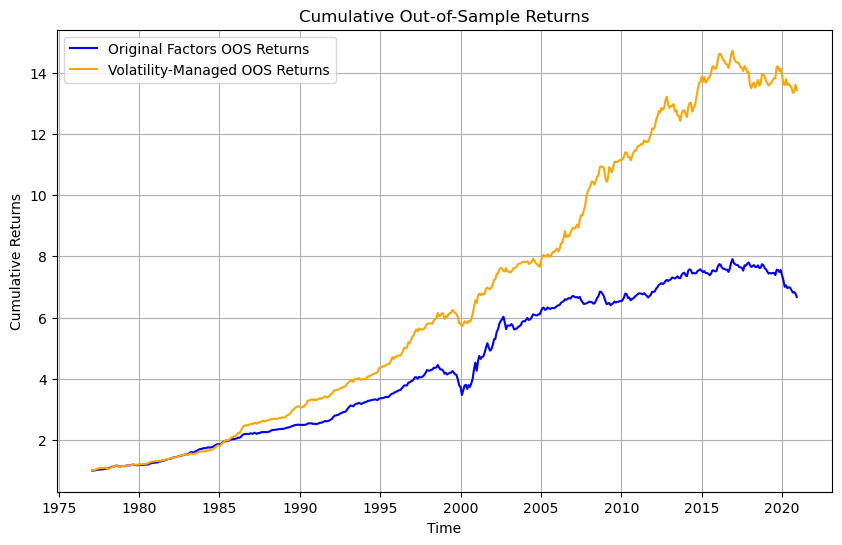

In [41]:
original_factors_oos_returns.index = original_factors_oos_returns.index.to_timestamp()
vol_managed_oos_returns.index = vol_managed_oos_returns.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot((1+original_factors_oos_returns).cumprod(), label="Original Factors OOS Returns", color="blue")
plt.plot((1+vol_managed_oos_returns).cumprod(), label="Volatility-Managed OOS Returns", color="orange")

plt.title("Cumulative Out-of-Sample Returns")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

### Question 2.3

The volatility-timed factor portfolio reduces the overall portfolio volatility and increases returns. Therefore, when comparing the Sharpe ratios, it can be concluded that the volatility-timed version is the superior strategy.

### Question 2.4

### **Limitations of Volatility-Timing Strategies**:

1. **Estimation Errors**: Volatility estimates based on past data may not accurately predict future risk, leading to poor decisions.

2. **Lack of Predictive Power**: High volatility doesn’t always correlate with poor future returns, and low volatility doesn’t guarantee good returns.

3. **Transaction Costs**: Frequent adjustments based on volatility incur high transaction costs, reducing the strategy's profitability.

4. **Market Timing Risks**: Incorrect volatility estimates can lead to being underexposed during rallies or overexposed during downturns.

5. **Implementation Challenges**: Volatility-timing strategies require advanced data and computational resources, which can be difficult to implement in practice.

6. **Overfitting**: The strategy can be overfit to historical data, making it ineffective in real-time market conditions.

7. **Limits to Arbitrage**: Market frictions, such as liquidity and regulatory constraints, may limit the ability to fully implement the strategy.

### **Practical Implementation**:
- It is challenging due to data quality, real-time adjustments, and execution delays.
- Institutional constraints may also limit its application.

In summary, volatility-timing can be effective in theory but faces significant practical hurdles, including data issues, high costs, and the risk of overfitting.